In [1]:
import astropy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
from astropy import coordinates as coord
from astropy import units as u
from astropy.io import ascii, fits
import aplpy

# Package versions:
print('Running on:')
print(f'\tAstropy\t\t{astropy.__version__}')
print(f'\tMatplotlib\t{plt.matplotlib.__version__}')
print(f'\tNumpy\t\t{np.__version__}')
print(f'\tAplpy\t\t{aplpy.__version__}')
#
%matplotlib inline
#python3.6
rc('text', usetex=True)
font = {'family' : 'serif','size'   : 18}
rc('font', **font)

Running on:
	Astropy		4.0.2
	Matplotlib	3.3.4
	Numpy		1.19.2
	Aplpy		2.0.3


In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
def fix_aplpy_fits(aplpy_obj, dropaxis=2):
    """This removes the degenerated dimensions because in APLpy 2.X they fucked it up...
    The input must be the figure returned by aplpy.FITSFigure().
    `dropaxis` is the index where to start dropping the axis (by default it assumes the 3rd,4th place).
    """
    temp_wcs = aplpy_obj._wcs.dropaxis(2)
    temp_wcs = temp_wcs.dropaxis(2)
    aplpy_obj._wcs = temp_wcs

In [3]:
def contour_levels(rms, nsigma=3, n_pos=5, n_neg=1):
    """ Return a list with the values of fluxes to plot a contour figure.
    n_* are the number of contours to positive values (above rms level) or
    negative ones (below rms level).
    It returns three lists:
    - with the negative and positive values for contours.
    - with only the positive contour values.
    - with only the negative contour values"""
    conts_p = [ rms*nsigma*2**(i/2.) for i in range(n_pos)]
    conts_n = [ -rms*5*2**(i/2.) for i in range(n_neg)]
    conts = conts_n[::-1]
    [conts.append(c) for c in conts_p]
    return conts, conts_p,conts_n 

In [4]:
# Because Difmap FITS files do not insert correctly BMAJ, BMIN, PA in the header..
bursts = {'B1': {'beam': {'major': 4*u.mas, 'minor': 2*u.mas, 'angle': 16}},
          'B2': {'beam': {'major': 10*u.mas, 'minor': 5*u.mas, 'angle': 15}}
          }    

## S-band full field plot

In [40]:
ref_pos_cygx1_source_ann = coord.SkyCoord('19h58m26.0669s', '35d12m40.2798s', frame='icrs') #cygx1 position
ref_pos_zo = coord.SkyCoord('19h58m14.0s', '35d17m20.7139s', frame='icrs') #centre for zoomed in image
ref_pos_lead_edge = coord.SkyCoord('19h58m08.1100s', '35d22m44.5287s', frame='icrs') #location of leading edge of shock
ref_pos_left_edge = coord.SkyCoord('19h58m40.0340s', '35d16m34.2127s', frame='icrs') #location of left edge of shock
ref_pos_right_edge = coord.SkyCoord('19h57m52.0694s', '35d14m30.8807s', frame='icrs') #location of right edge of shock
ref_pos_right_overdense = coord.SkyCoord('19h57m49.5575s', '35d19m33.3498s', frame='icrs') #location of right over density
ref_pos = coord.SkyCoord('19h58m21.67s', '35d11m50.7000s', frame='icrs') #L-band pointing centre

ref_pos_cygx1 = coord.SkyCoord('19h58m13.7057s', '35d16m52.5675s', frame='icrs') #cygx1 white circle centre
ref_pos_cygx1_ann = coord.SkyCoord('19h58m20.2680s', '35d26m19.7519s', frame='icrs') #cygx1 position
ref_pos_W1 = coord.SkyCoord('19h57m27.9546s', '35d22m47.6481s', frame='icrs')
ref_pos_W1_ann = coord.SkyCoord('19h57m13.7s', '35d28m48.7000s', frame='icrs')
ref_pos_W2 = coord.SkyCoord('19h57m54.4932s', '35d04m29.6783s', frame='icrs')
ref_pos_W2_ann = coord.SkyCoord('19h56m54.5210', '35d05m06.4865s', frame='icrs')


INFO: Setting slices=[0, 0] [aplpy.core]


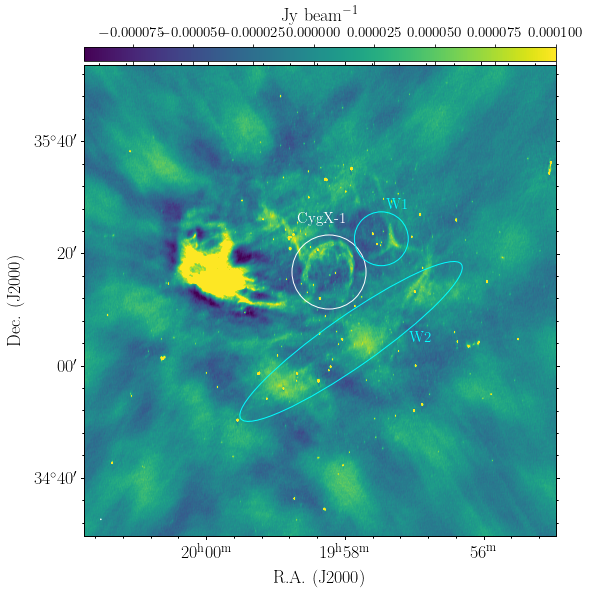

In [24]:
#fig = aplpy.FITSFigure('./positive_briggs_mask3/image.fits')
fig = aplpy.FITSFigure('./S_band/S_band.fits')
fix_aplpy_fits(fig)
fig.recenter(ref_pos.ra.value, ref_pos.dec.value, radius=0.7)
#fig.show_colorscale(vmin=-2.0e-04, vmax=5e-04,interpolation='bicubic', cmap='Greys', stretch='linear') 
fig.show_colorscale(vmin=-9.5e-05, vmax=1.0e-04,interpolation='bicubic', cmap='viridis', stretch='linear') 
fig.add_colorbar()
fig.show_circles(ref_pos_cygx1.ra.value, ref_pos_cygx1.dec.value, radius=0.11, edgecolor='white')
fig.add_label(ref_pos_cygx1_ann.ra.value, ref_pos_cygx1_ann.dec.value, 'CygX-1', fontsize=15, color='white')
fig.show_circles(ref_pos_W1.ra.value, ref_pos_W1.dec.value, radius=0.08, edgecolor='cyan')
fig.add_label(ref_pos_W1_ann.ra.value, ref_pos_W1_ann.dec.value, 'W1',fontsize=15, color='cyan')
fig.show_ellipses(ref_pos_W2.ra.value, ref_pos_W2.dec.value, 0.15, 0.8, angle=125, edgecolor='cyan')
fig.add_label(ref_pos_W2_ann.ra.value, ref_pos_W2_ann.dec.value, 'W2',fontsize=15, color='cyan')
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
plt.show()
#plt.savefig('S_band_full_field.pdf',bbox_inches='tight')

INFO: Setting slices=[0, 0] [aplpy.core]


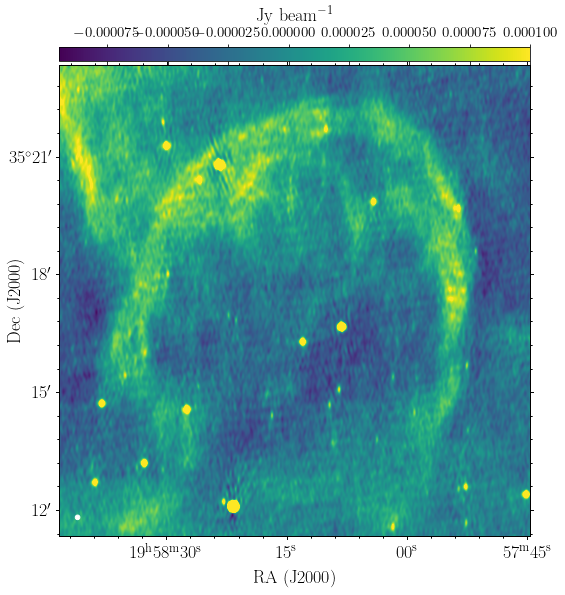

In [26]:
#Zoomed in to the bowshock
fig = aplpy.FITSFigure('./S_band/S_band.fits')
fix_aplpy_fits(fig)
#fig.show_regions('./positive_briggs_mask3/region_for_paper.reg', layer=False)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-9.5e-05, vmax=1.0e-04,interpolation='bicubic', cmap='viridis', stretch='linear') 
#fig.show_colorscale(vmin=-2.5e-04, vmax=5e-04,interpolation='bicubic', cmap='bone', stretch='linear') #, vmax=0.8, vmin=0.1)
fig.add_colorbar()
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
#fig.axis_labels.set_xtext(r'R.A. (J2000)')
#fig.axis_labels.set_ytext(r'Dec. (J2000)')
#plt.show()
#plt.savefig('./S_band_bowshock_zoomed.pdf',bbox_inches='tight')

In [27]:
contour_levels = [1.4e-5,3.4e-5,7.4e-5,1.5e-4,3.14e-4,6.34e-4,1.27e-3]

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


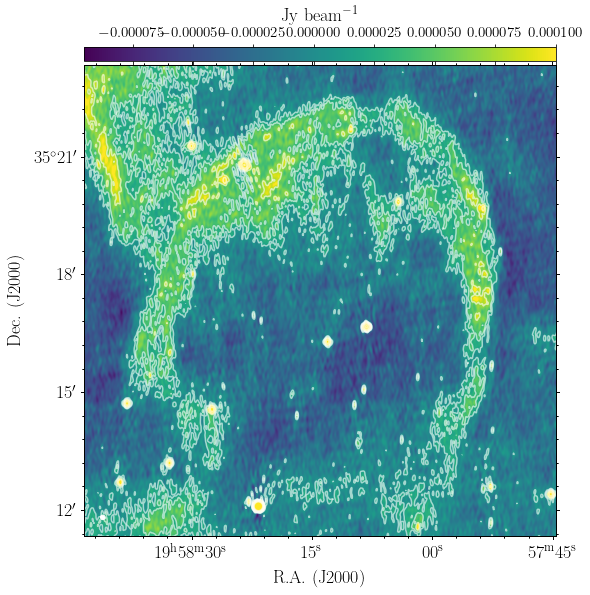

In [28]:
#making contour map
fig = aplpy.FITSFigure('./S_band/S_band.fits')
fix_aplpy_fits(fig)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-9.5e-05, vmax=1.0e-04,interpolation='bicubic', cmap='viridis', stretch='linear') 
fig.add_colorbar()
fig.show_contour('./S_band/S_band.fits', levels=contour_levels, colors='white', layer=f"cont", alpha=0.6, overlap=True, smooth=True)
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
plt.show()
#plt.savefig('./bowshock_fullzoom.pdf',bbox_inches='tight')

In [34]:
#contour map with smoothed image
from scipy.ndimage import gaussian_filter

# Load your FITS data
data, header = fits.getdata('./S_band/S_band.fits', header=True)

# Apply Gaussian smoothing
sigma = 2.5  # Adjust sigma as needed
smoothed_data = gaussian_filter(data, sigma=sigma)

# Save the smoothed data to a new FITS file
smoothed_fits = './S_band/S_band_smoothed.fits'
fits.writeto(smoothed_fits, smoothed_data, header, overwrite=True)


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


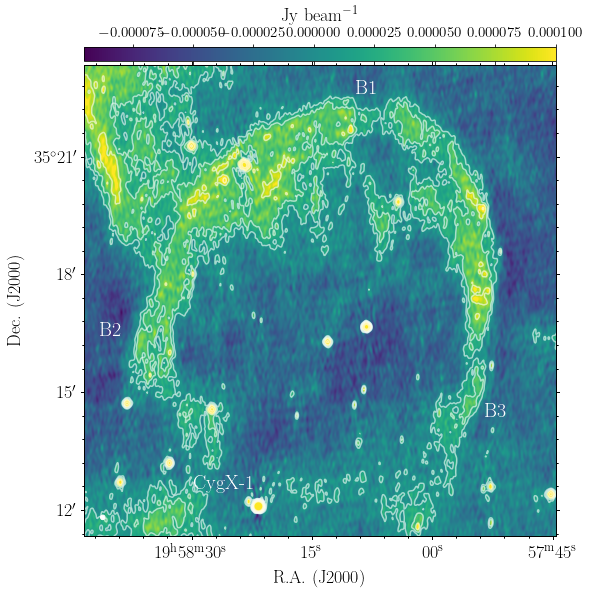

In [53]:
fig = aplpy.FITSFigure('./S_band/S_band.fits')
fix_aplpy_fits(fig)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-9.5e-05, vmax=1.0e-04,interpolation='bicubic', cmap='viridis', stretch='linear') 
fig.add_colorbar()
fig.show_contour('./S_band/S_band_smoothed.fits', levels=contour_levels, colors='white', layer=f"cont", alpha=0.6, overlap=True, smooth=True)
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_label(ref_pos_cygx1_source_ann.ra.value, ref_pos_cygx1_source_ann.dec.value, 'CygX-1', fontsize=20, color='white', alpha=2)
fig.add_label(ref_pos_lead_edge.ra.value, ref_pos_lead_edge.dec.value, 'B1', fontsize=20, color='white')
fig.add_label(ref_pos_left_edge.ra.value, ref_pos_left_edge.dec.value, 'B2', fontsize=20, color='white')
fig.add_label(ref_pos_right_edge.ra.value, ref_pos_right_edge.dec.value, 'B3', fontsize=20, color='white')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
#plt.show()
plt.savefig('./S-band_contour.pdf',bbox_inches='tight')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


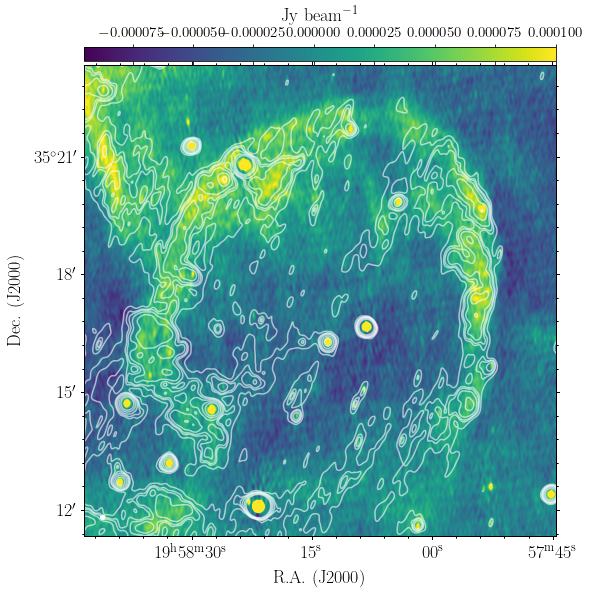

In [52]:
contour_levels_lband = [5.5e-5,9.5e-5,1.15e-4,1.55e-4,2.35e-4,3.55e-4]
#From Gallo et al. 2005 Zoomed in to the bowshock and with meerkat contours
fig = aplpy.FITSFigure('./S_band/S_band.fits')
fix_aplpy_fits(fig)
#fig.show_regions('./positive_briggs_mask3/region_for_paper.reg', layer=False)
fig.show_contour('./31july_Lband_newest/L-band_smoothed.fits', levels=contour_levels_lband, colors='white', layer=f"cont", alpha=0.6, overlap=True, smooth=True)
fig.recenter(ref_pos_zo.ra.value, ref_pos_zo.dec.value, radius=0.1)
fig.show_colorscale(vmin=-9.5e-05, vmax=1.0e-04,interpolation='bicubic', cmap='viridis', stretch='linear') 
fig.add_colorbar()
#fig.add_label(ref_pos_right_overdense.ra.value, ref_pos_right_overdense.dec.value, 'A4', fontsize=20, color='white')
fig.colorbar.set_font(size='small')
fig.colorbar.set_location('top')
fig.colorbar.set_axis_label_text('Jy $\mathrm{beam^{-1}}$')
fig.add_beam()
fig.beam.set_color('w')
fig.beam.set_edgecolor('w')
fig.frame.set_color('k')
fig.ticks.set_color('k')
fig.axis_labels.set_ypad(-0.4)
fig.axis_labels.set_xtext(r'R.A. (J2000)')
fig.axis_labels.set_ytext(r'Dec. (J2000)')
#plt.show()
plt.savefig('./Lband+Sband_contour.pdf',bbox_inches='tight')

In [47]:
bowshock_width = [1.08,0.8,1.03,1.06,18,2.2,2.0,0.9,1,0.7,0.9,0.5,0.4,0.8,1.2,1.7,2.2,4.03,2.2,1.2]
print(np.mean(bowshock_width))

2.1950000000000003


In [58]:
import numpy as np

bowshock_width = [1.08, 0.8, 1.03, 1.06, 1.8, 2.2, 2.0, 0.9, 1, 0.7, 0.9, 0.5, 0.4, 0.8, 1.2, 1.7, 2.2, 4.03, 2.2, 1.2]
bowshock_width_mean = np.mean(bowshock_width)
standard_deviation = np.std(bowshock_width)
bowshock_width_err = standard_deviation / np.sqrt(len(bowshock_width))
print(f'The mean width of the bowshock is {bowshock_width_mean} with an error of {bowshock_width_err}')

The mean width of the bowshock is 1.385 with an error of 0.18410119499883756
